In [1]:
import pandas as pd
%pylab inline
%load_ext autoreload
%autoreload 2
#%matplotlib nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

from UKMovementSensing import hsmm

In [3]:
path_to_files = "/media/sf_VBox_Shared/London/accelerometer_5second/merged/"
path_to_file5sec = os.path.join(path_to_files, "__016563_2014-08-08 12-02-19.bin_day1.csv")
day1_5sec = pd.read_csv(path_to_file5sec)

In [4]:
day1_5sec = day1_5sec.set_index('timestamp')
day1_5sec.index = pd.to_datetime(day1_5sec.index)
print(min(day1_5sec.index))
print(max(day1_5sec.index))

2014-08-01 04:00:00
2014-08-02 03:59:55


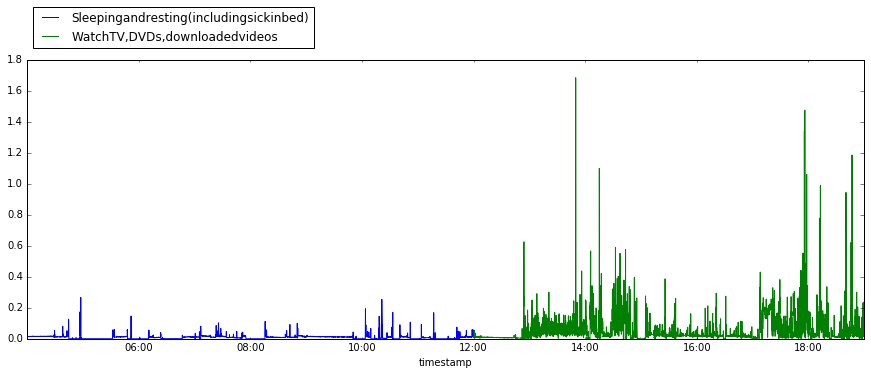

In [5]:
byAct = day1_5sec.groupby('Activity')
fig, ax = plt.subplots(figsize=(15,5))
for act,dfa in byAct:
    dfa['acceleration'].plot(label=act)
legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3);

In [6]:
X = np.column_stack([day1_5sec.anglex, day1_5sec.angley, day1_5sec.anglez]) #, day1_5sec.acceleration])
column_names = ['anglex', 'angley', 'anglez', 'acceleration']
print(column_names)
print(X.shape)

['anglex', 'angley', 'anglez', 'acceleration']
(17280, 3)


/home/dafne/anaconda2/envs/ucl2/lib/python2.7/site-packages/pybasicbayes/util/stats.py:185: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  x = np.random.randn(nu,n)


9
19
29
39


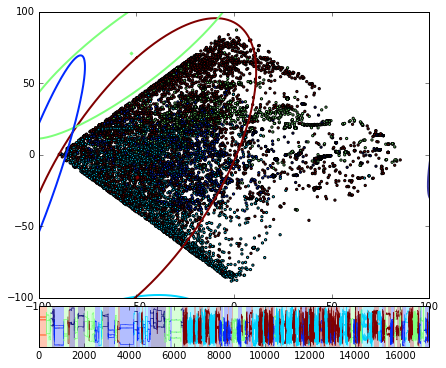

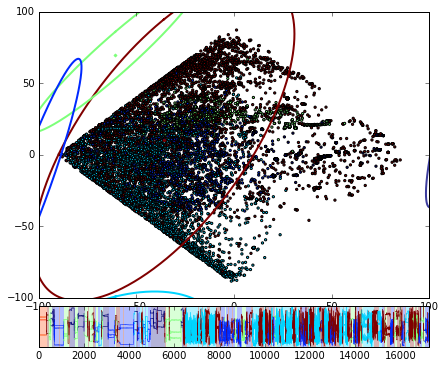

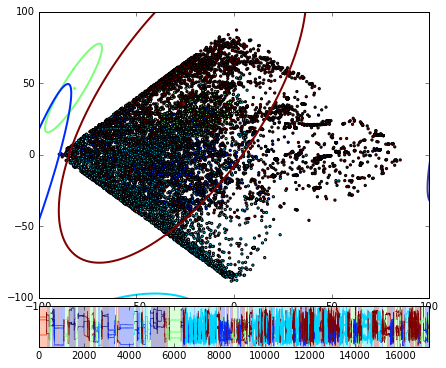

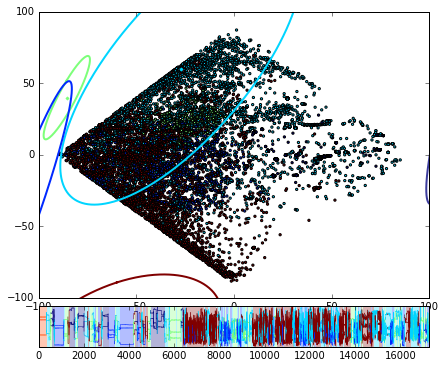

In [7]:
model = hsmm.train_hsmm(X, Nmax=7, nr_resamples=40, visualize=True)

In [8]:
data = day1_5sec
hidden_states = model.stateseqs[0]

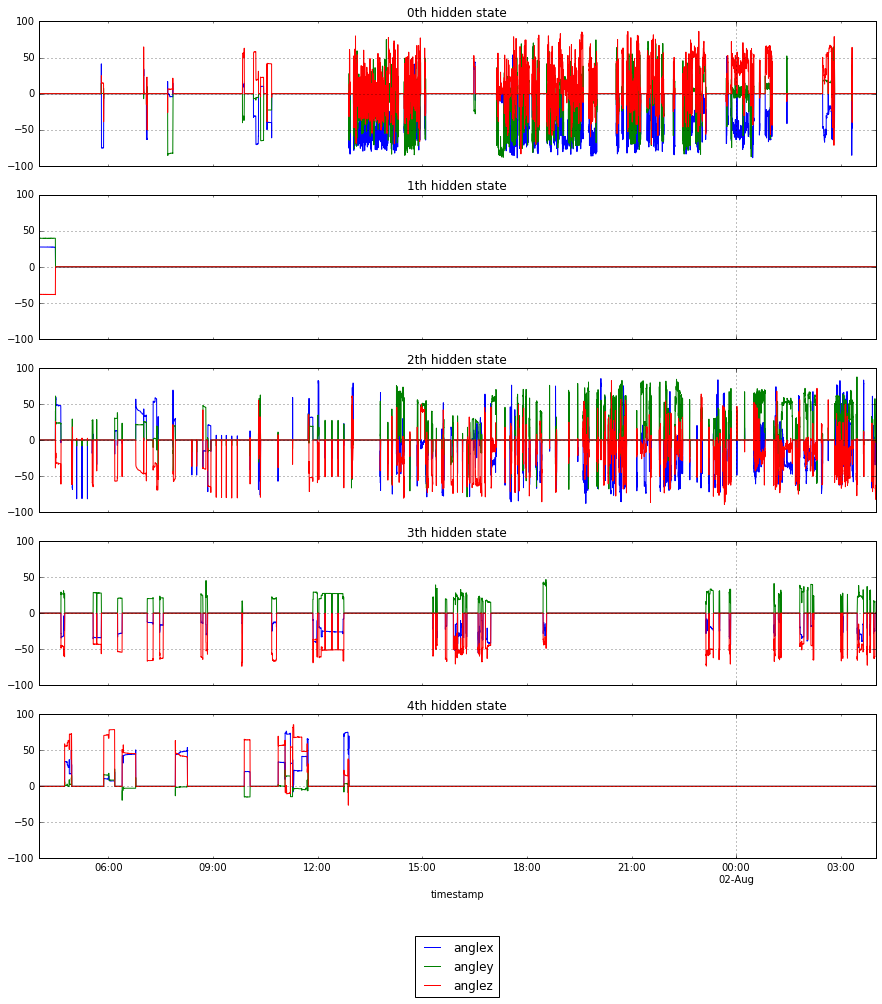

In [9]:
hsmm.plot_perstate(data[['anglex', 'angley', 'anglez']], hidden_states)

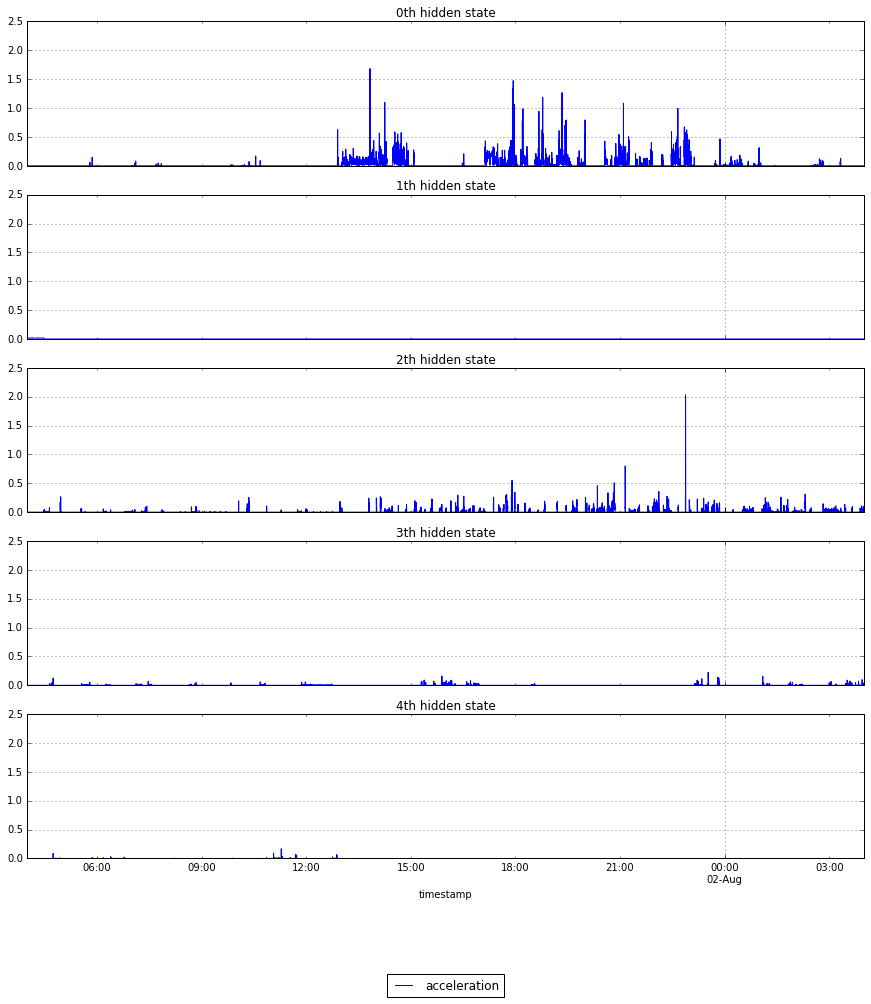

In [20]:
hsmm.plot_perstate(data[['acceleration']], hidden_states)

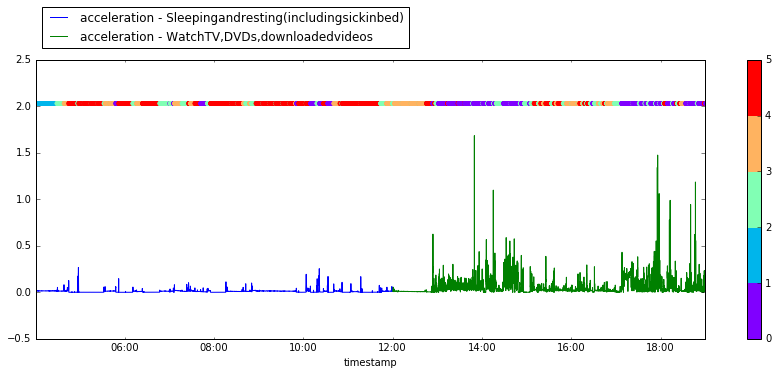

In [32]:
hsmm.plot_states_and_var(data, ['acceleration'], hidden_states, by='Activity')

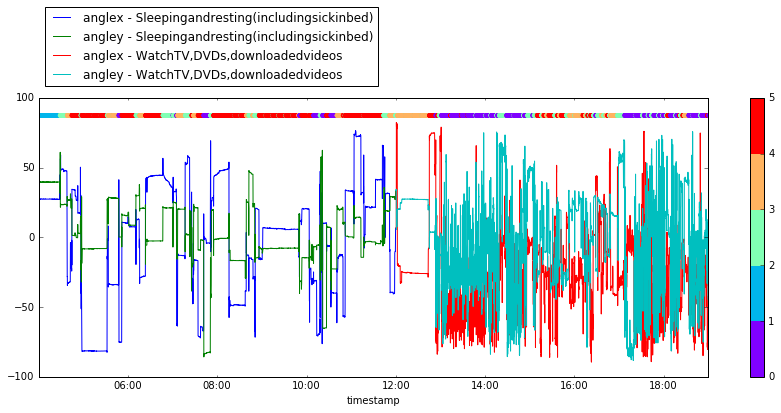

In [33]:
hsmm.plot_states_and_var(data, ['anglex', 'angley'], hidden_states, by='Activity')

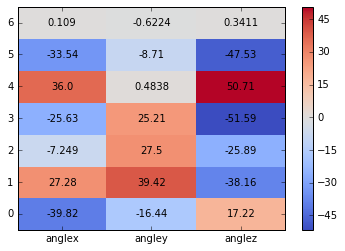

In [47]:
#Plot the means
plotdata = np.array([d.mu for d in model.obs_distns])

hsmm.plot_heatmap(plotdata, horizontal_labels=column_names)

In [38]:
#Plot the mean of the acceleration
#plotdata2 = plotdata[:,3][:,np.newaxis]
#hsmm.plot_heatmap(plotdata2, column_names)

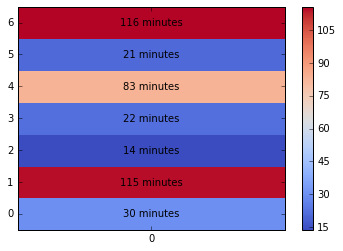

In [57]:
# Plot expected duration
plotdata = np.array([d.lmbda/3. for d in model.dur_distns])[:,np.newaxis]
#grouplabels = ["{:.3} minutes".format(x/3.) for x in plotdata[:,0]]
hsmm.plot_heatmap(plotdata, form='{:.0f} minutes')

Plot the covariance matrix for each state

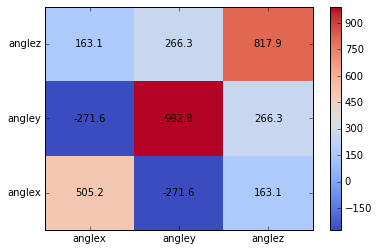

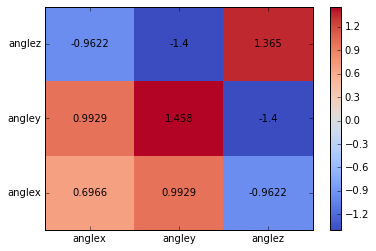

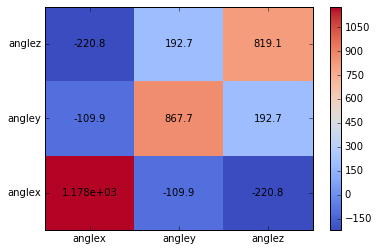

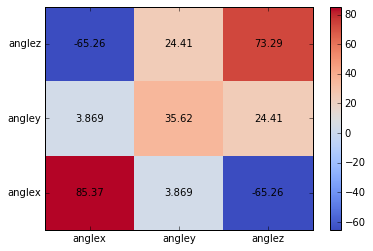

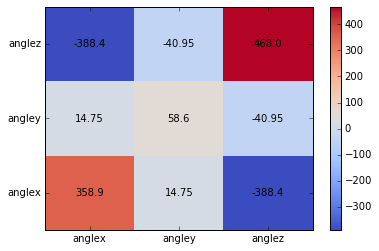

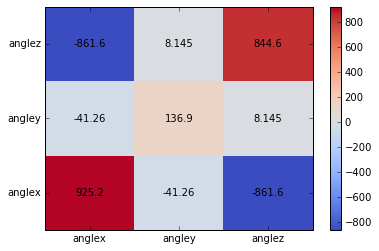

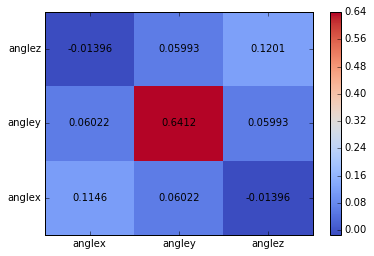

In [59]:
#fig, axs = plt.subplots(nrows=model.num_states, ncols=1,  figsize = (10, 15))
for i in range(model.num_states):
    plotdata = model.obs_distns[i].sigma
    #plt.sca(axs[i])
    hsmm.plot_heatmap(plotdata, horizontal_labels=column_names, vertical_labels=column_names)
#colorbar()
show()

In [ ]:
from scipy.stats.kde import gaussian_kde

variable = "anglez"#"acceleration"

fig, ax = subplots()
#day1_5sec.hist(variable, bins=100)
vals = data[variable]
kde = gaussian_kde(vals)
d = np.linspace(min(vals), max(vals), 100)
p = plot(d, kde(d), label="all")

for i in range(model.num_states):
    mask = hidden_states == i
    if(sum(mask)>0):
        kde = gaussian_kde(vals[mask])
        plot(d, kde(d), label=str(i))
#ax.set_xlim(0,0.1)
legend()
show()

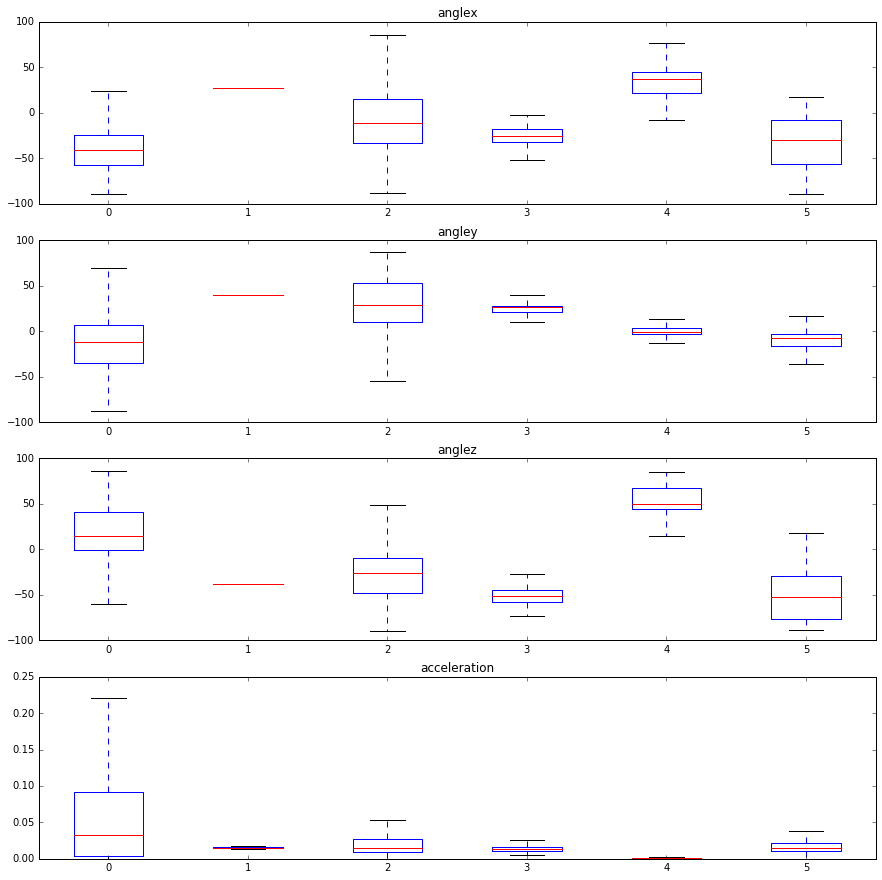

In [63]:
hsmm.plot_boxplots(data[column_names], hidden_states)